In [3]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os

In [30]:

path = '../dataset/herbarium_2022/'
train_dir = path + 'train_images/'
test_dir = path + 'test_images/'

with open( path + "train_metadata.json") as json_file:
    train_meta = json.load(json_file)
with open(path + "test_metadata.json") as json_file:
    test_meta = json.load(json_file)


In [31]:
train_meta.keys()

dict_keys(['annotations', 'images', 'categories', 'genera', 'institutions', 'distances', 'license'])

In [32]:
train_meta['annotations'][:2]

[{'genus_id': 1,
  'institution_id': 0,
  'category_id': 0,
  'image_id': '00000__001'},
 {'genus_id': 1,
  'institution_id': 0,
  'category_id': 0,
  'image_id': '00000__002'}]

In [33]:
train_meta['distances'][:2]

[{'genus_id_x': 2508, 'genus_id_y': 2576, 'distance': 0.0325632},
 {'genus_id_x': 2508, 'genus_id_y': 2518, 'distance': 0.0254073}]

In [34]:
image_ids = [image["image_id"] for image in train_meta["images"]]
image_dirs = [train_dir + image['file_name'] for image in train_meta["images"]]
category_ids = [annotation['category_id'] for annotation in train_meta['annotations']]
genus_ids = [annotation['genus_id'] for annotation in train_meta['annotations']]
institutions_ids = [annotation['institution_id'] for annotation in train_meta['annotations']]

test_ids = [image['image_id'] for image in test_meta]
test_dirs = [test_dir + image['file_name'] for image in test_meta]

train_df = pd.DataFrame({
    "image_id" : image_ids,
    "image_dir" : image_dirs,
    "category" : category_ids,
    "genus" : genus_ids,
    "institutions" : institutions_ids})

test_df = pd.DataFrame({
    "test_id" : test_ids,
    "test_dir" : test_dirs
})

In [35]:
train_df.head()

image_id                                          image_dir  category  \
0  00000__001  ../dataset/herbarium_2022/train_images/000/00/...         0   
1  00000__002  ../dataset/herbarium_2022/train_images/000/00/...         0   
2  00000__003  ../dataset/herbarium_2022/train_images/000/00/...         0   
3  00000__004  ../dataset/herbarium_2022/train_images/000/00/...         0   
4  00000__005  ../dataset/herbarium_2022/train_images/000/00/...         0   

   genus  institutions  
0      1             0  
1      1             0  
2      1             0  
3      1             0  
4      1             0

In [36]:
genus_map = {genus['genus_id'] : genus['genus'] for genus in train_meta['genera']}
train_df['genus'] = train_df['genus'].map(genus_map)
train_df.tail()

image_id                                          image_dir  \
839767  15504__032  ../dataset/herbarium_2022/train_images/155/04/...   
839768  15504__033  ../dataset/herbarium_2022/train_images/155/04/...   
839769  15504__035  ../dataset/herbarium_2022/train_images/155/04/...   
839770  15504__036  ../dataset/herbarium_2022/train_images/155/04/...   
839771  15504__037  ../dataset/herbarium_2022/train_images/155/04/...   

        category        genus  institutions  
839767     15504  Zygophyllum            55  
839768     15504  Zygophyllum            53  
839769     15504  Zygophyllum            13  
839770     15504  Zygophyllum            13  
839771     15504  Zygophyllum            13

In [37]:
print(len(train_df.genus.value_counts()))
print(len(train_df.category.value_counts()))
print(len(train_df.institutions.value_counts()))

2564
15501
60


In [38]:
print('Top 15 Genus ')
print(train_df['category'].value_counts().head(15))

Top 15 Genus 
2774     80
8854     80
12540    80
10805    80
12530    80
1146     80
4661     80
1145     80
12524    80
2876     80
8800     80
8794     80
4641     80
2889     80
12515    80
Name: category, dtype: int64


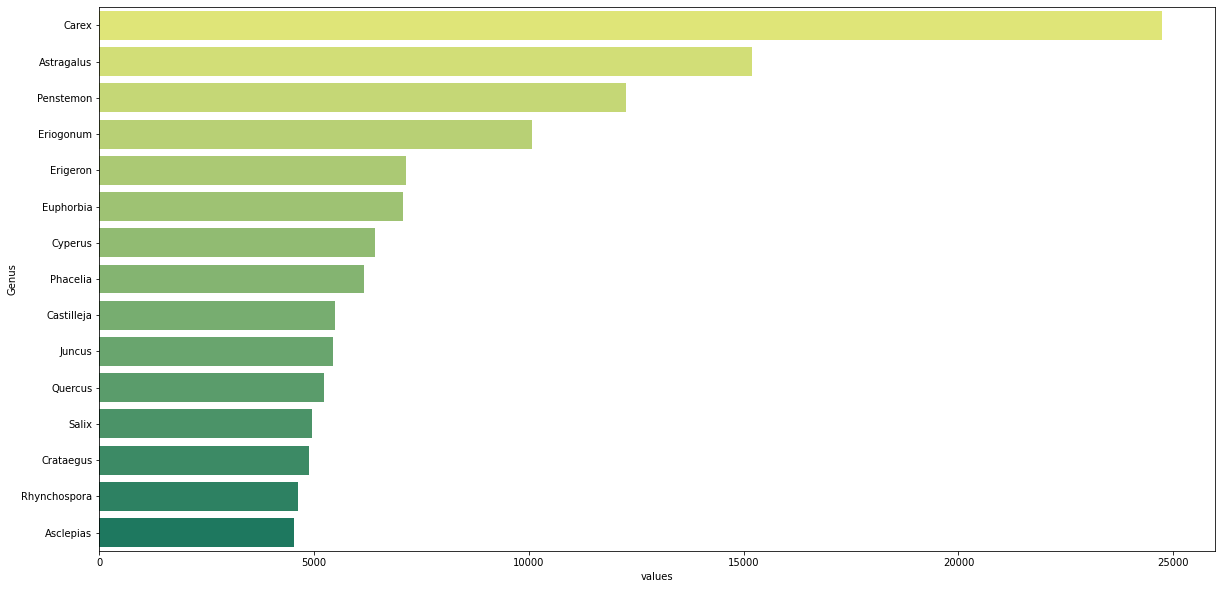

In [39]:
data = train_df['genus'].value_counts().head(15)
data = pd.DataFrame({'Genus' : data.index,
                     'values' : data.values})
plt.figure(figsize = (20, 10))
sns.barplot(x='values', y = 'Genus', data = data , palette='summer_r')
plt.show()

In [40]:
def show_images(speices):
    images = train_df.loc[train_df['genus'] == speices]['image_dir'][:6]
    i = 1
    fig = plt.figure(figsize = (18, 18))
    plt.suptitle(speices, fontsize = '30')
    for image in images:
        print(image)
        img = cv2.imread(image)
        print(img.shape)
        ax = fig.add_subplot(2, 3, i)
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax.set_axis_off()
        i += 1
    plt.show()

../dataset/herbarium_2022/train_images/025/34/02534__001.jpg
(1000, 681, 3)
../dataset/herbarium_2022/train_images/025/34/02534__003.jpg
(1000, 681, 3)
../dataset/herbarium_2022/train_images/025/34/02534__004.jpg
(1000, 681, 3)
../dataset/herbarium_2022/train_images/025/34/02534__005.jpg
(1000, 681, 3)
../dataset/herbarium_2022/train_images/025/34/02534__006.jpg
(1000, 681, 3)
../dataset/herbarium_2022/train_images/025/34/02534__007.jpg
(1000, 681, 3)


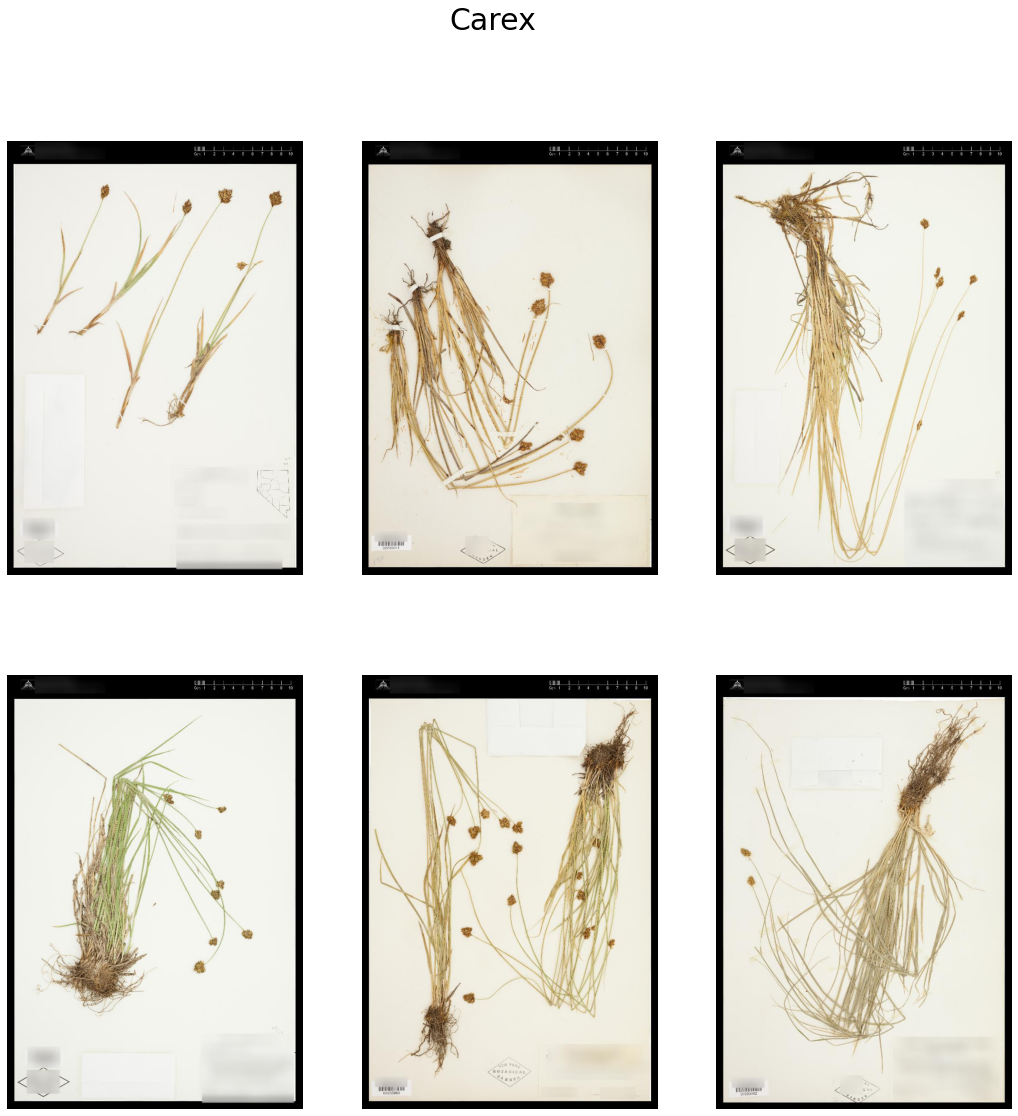

In [41]:
show_images('Carex')

../dataset/herbarium_2022/train_images/013/52/01352__001.jpg
(1000, 703, 3)
../dataset/herbarium_2022/train_images/013/52/01352__002.jpg
(1000, 666, 3)
../dataset/herbarium_2022/train_images/013/52/01352__003.jpg
(1000, 666, 3)
../dataset/herbarium_2022/train_images/013/52/01352__004.jpg
(1000, 694, 3)
../dataset/herbarium_2022/train_images/013/52/01352__005.jpg
(1000, 666, 3)
../dataset/herbarium_2022/train_images/013/52/01352__007.jpg
(1000, 666, 3)


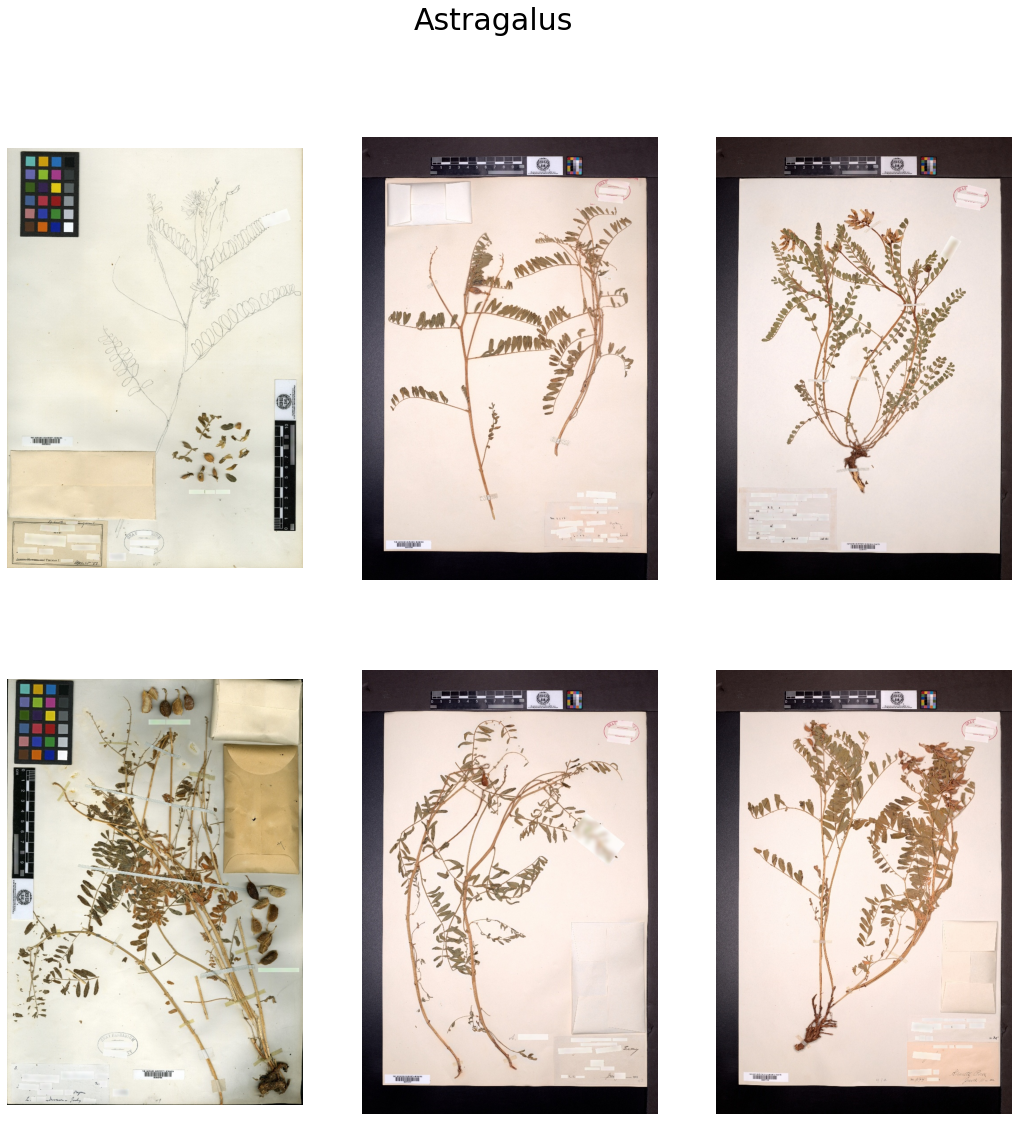

In [42]:
show_images('Astragalus')

../dataset/herbarium_2022/train_images/105/88/10588__001.jpg
(1000, 693, 3)
../dataset/herbarium_2022/train_images/105/88/10588__002.jpg
(1000, 681, 3)
../dataset/herbarium_2022/train_images/105/88/10588__004.jpg
(1000, 681, 3)
../dataset/herbarium_2022/train_images/105/88/10588__005.jpg
(1000, 681, 3)
../dataset/herbarium_2022/train_images/105/88/10588__006.jpg
(1000, 681, 3)
../dataset/herbarium_2022/train_images/105/88/10588__007.jpg
(1000, 681, 3)


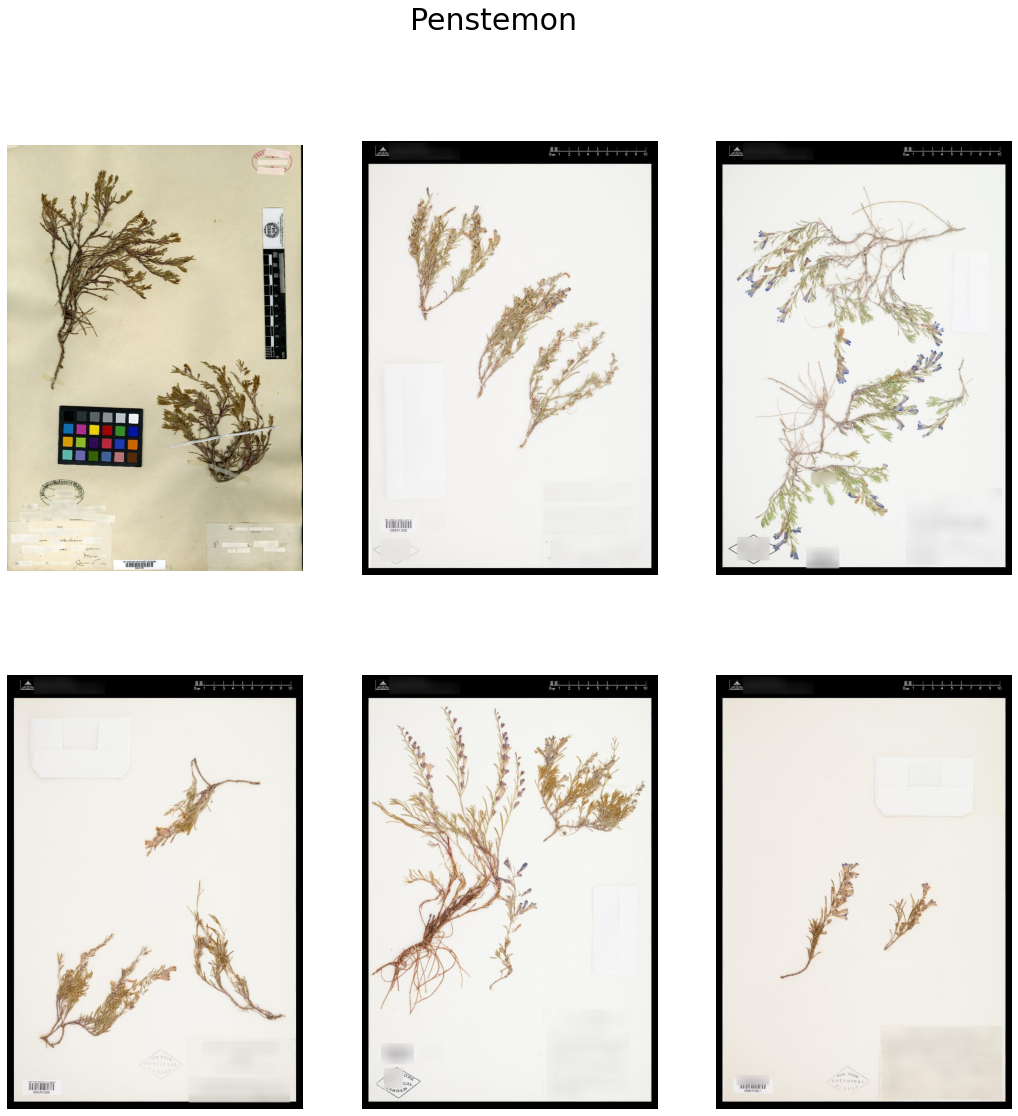

In [43]:
show_images('Penstemon')

../dataset/herbarium_2022/train_images/057/27/05727__001.jpg
(1000, 666, 3)
../dataset/herbarium_2022/train_images/057/27/05727__002.jpg
(1000, 666, 3)
../dataset/herbarium_2022/train_images/057/27/05727__003.jpg
(1000, 666, 3)
../dataset/herbarium_2022/train_images/057/27/05727__004.jpg
(1000, 666, 3)
../dataset/herbarium_2022/train_images/057/27/05727__007.jpg
(1000, 689, 3)
../dataset/herbarium_2022/train_images/057/27/05727__008.jpg
(1000, 666, 3)


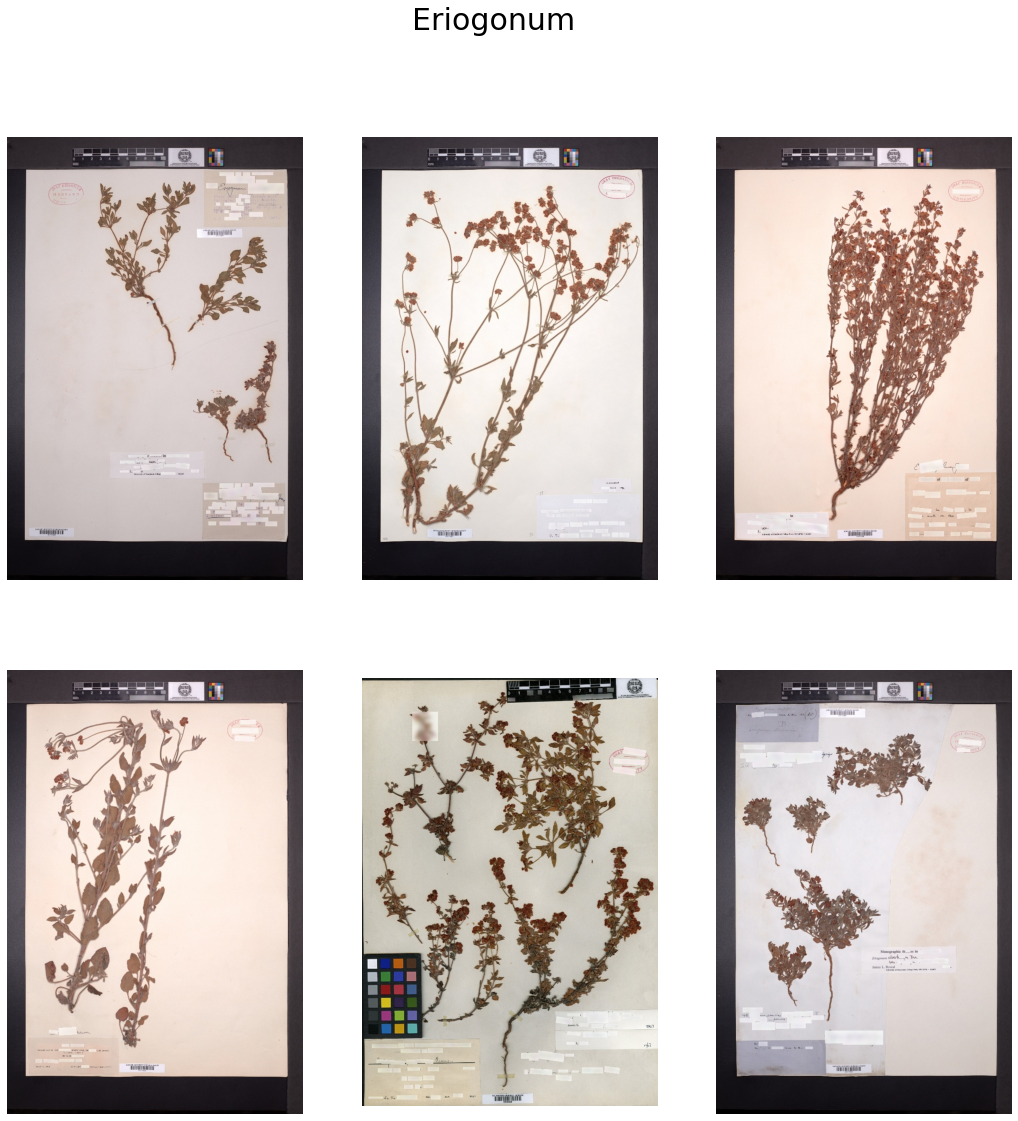

In [44]:
show_images('Eriogonum')

../dataset/herbarium_2022/train_images/055/46/05546__002.jpg
(1000, 698, 3)
../dataset/herbarium_2022/train_images/055/46/05546__003.jpg
(1000, 681, 3)
../dataset/herbarium_2022/train_images/055/46/05546__004.jpg
(1000, 681, 3)
../dataset/herbarium_2022/train_images/055/46/05546__006.jpg
(1000, 681, 3)
../dataset/herbarium_2022/train_images/055/46/05546__007.jpg
(1000, 681, 3)
../dataset/herbarium_2022/train_images/055/46/05546__008.jpg
(1000, 681, 3)


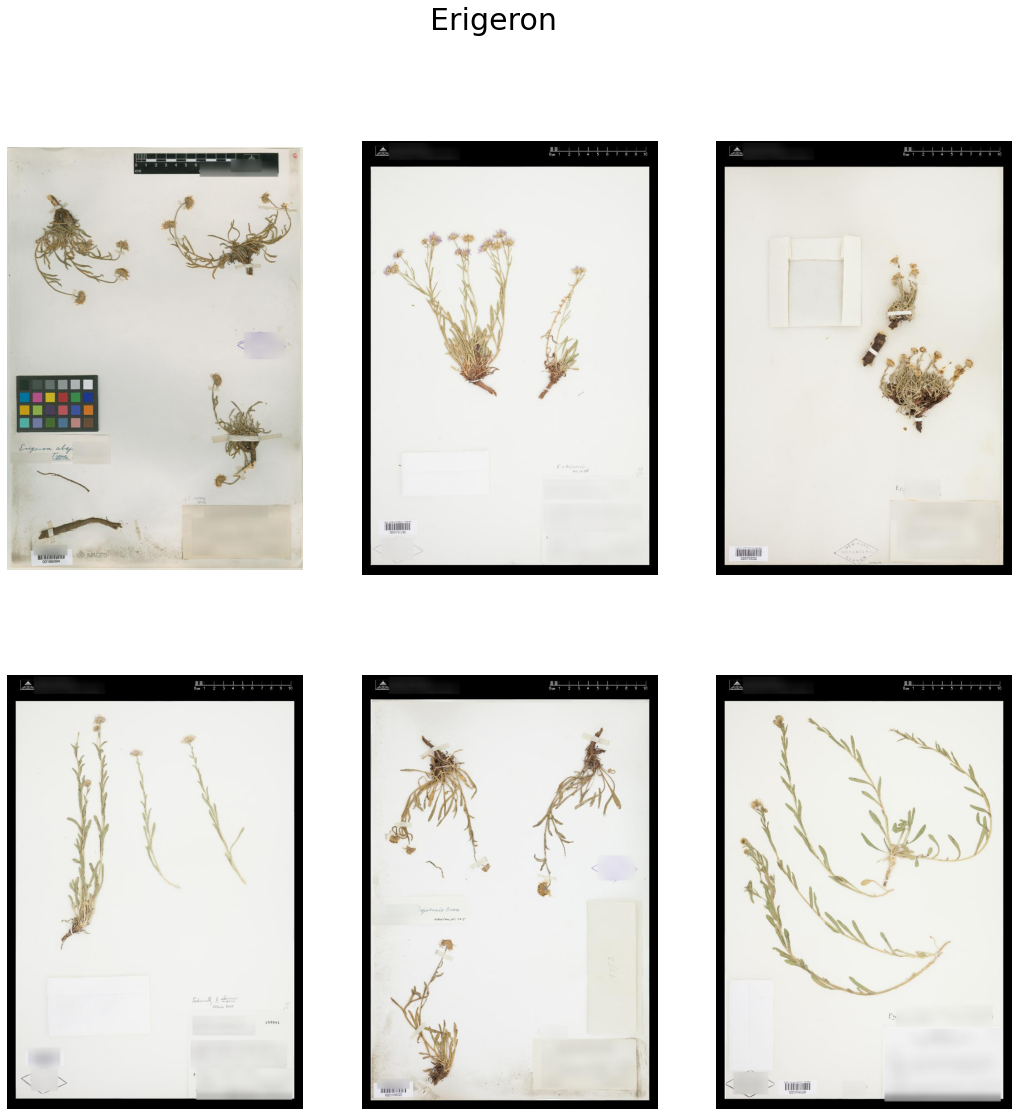

In [45]:
show_images('Erigeron')

In [46]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image

/home/beomgon/anaconda3/envs/pl/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [49]:
print(len(train_df.genus.value_counts()))
print(len(train_df.category.value_counts()))
print(len(train_df.institutions.value_counts()))
train_df.head()


2564
15501
60


image_id                                          image_dir  category  \
0  00000__001  ../dataset/herbarium_2022/train_images/000/00/...         0   
1  00000__002  ../dataset/herbarium_2022/train_images/000/00/...         0   
2  00000__003  ../dataset/herbarium_2022/train_images/000/00/...         0   
3  00000__004  ../dataset/herbarium_2022/train_images/000/00/...         0   
4  00000__005  ../dataset/herbarium_2022/train_images/000/00/...         0   

   genus  institutions  
0  Abies             0  
1  Abies             0  
2  Abies             0  
3  Abies             0  
4  Abies             0

In [48]:
BATCH = 128
EPOCHS = 5

LR = 0.01
IM_SIZE = 224

X_Train, Y_Train = train_df['image_dir'].values, train_df['category'].values

Transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Resize((IM_SIZE, IM_SIZE)),
    transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))])

In [50]:
class GetData(Dataset):
    def __init__(self, FNames, Labels, Transform):
        self.fnames = FNames
        self.transform = Transform
        self.labels = Labels         
        
    def __len__(self):
        return len(self.fnames)

    def __getitem__(self, index):       
        x = Image.open(self.fnames[index])
    
        if "train" in self.fnames[index]:             
            return self.transform(x), self.labels[index]
        elif "test" in self.fnames[index]:            
            return self.transform(x), self.fnames[index]
                
trainset = GetData(X_Train, Y_Train, Transform)
trainloader = DataLoader(trainset, batch_size=BATCH, shuffle=True)

N_Classes = train_df['category'].nunique()
next(iter(trainloader))[0].shape

device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
model = torchvision.models.densenet169(pretrained=True)

Downloading: "https://download.pytorch.org/models/densenet169-b2777c0a.pth" to /home/beomgon/.cache/torch/hub/checkpoints/densenet169-b2777c0a.pth
100%|██████████| 54.7M/54.7M [00:00<00:00, 159MB/s]


In [51]:
print(model.classifier.in_features) 
print(model.classifier.out_features)

for param in model.parameters():
    param.requires_grad = False
    
n_inputs = model.classifier.in_features
last_layer = nn.Linear(n_inputs, N_Classes)
model.classifier = last_layer
if torch.cuda.is_available():
    model.cuda()
print(model.classifier.out_features)    

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.classifier.parameters())

1664
1000
15501


In [52]:
training_history = {'accuracy':[],'loss':[]}
validation_history = {'accuracy':[],'loss':[]}

from tqdm import tqdm

def train(trainloader, model, criterion, optimizer, scaler, device=torch.device("cpu")):
    train_acc = 0.0
    train_loss = 0.0
    for images, labels in tqdm(trainloader):
        images = images.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
    with torch.cuda.amp.autocast(enabled=True):
        output = model(images)
        loss = criterion(output, labels)
        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()
        acc = ((output.argmax(dim=1) == labels).float().mean())
        train_acc += acc
        train_loss += loss
    return train_acc/len(trainloader), train_loss/len(trainloader)

In [53]:
## Normal Evaluation
def evaluate(testloader, model, criterion, device=torch.device("cpu")):
    eval_acc = 0.0
    eval_loss = 0.0
    for images, labels in tqdm(testloader):
        images = images.to(device)
        labels = labels.to(device)
        with torch.no_grad():
            output = model(images)
            loss = criterion(output, labels)

        acc = ((output.argmax(dim=1) == labels).float().mean())
        eval_acc += acc
        eval_loss += loss
  
    return eval_acc/len(testloader), eval_loss/len(testloader)

In [54]:
%%time
##%dirsrmal Training
scaler = torch.cuda.amp.GradScaler(enabled=True)
for epoch in range(EPOCHS):
    train_acc, train_loss = train(trainloader, model, criterion, optimizer, scaler, device=device)
#   eval_acc, eval_loss = evaluate(val_loader, model, criterion, device=torch.device("cuda"))
    print("")
    print(f"Epoch {epoch + 1} | Train Acc: {train_acc*100} | Train Loss: {train_loss}")
#   print(f"\t Val Acc: {eval_acc*100} | Val Loss: {eval_loss}")
    print("===="*8)

  0%|          | 10/6561 [01:43<18:50:19, 10.35s/it]

KeyboardInterrupt

